In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle
# import openpyxl as px
# from pyexcel_xls import get_data

%matplotlib inline

First, read the csv data files, and convert the index 'Timestamp' to datetimeindex.

In [33]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
CSVdata=pd.read_csv('Building Electrical.csv', parse_dates=[0], date_parser=dateparse)


In [34]:
data=pd.read_csv('Building Electrical.csv', parse_dates=[0], date_parser=dateparse)
data['Hour']=data['Timestamp'].dt.hour
data['Date']=data['Timestamp'].dt.date
data['Date1']=data['Timestamp'].dt.date
data['Porter Hall Electric Real Power']=data['Porter Hall Electric Real Power'].convert_objects(convert_numeric=True)
data

/Users/LIJING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Timestamp,Porter Hall Electric Real Power,Baker Hall Electric Real Power,Hunt Library Real Power,Hour,Date,Date1
0,2015-01-01 00:00:06,54551.0,149552,152521,0,2015-01-01,2015-01-01
1,2015-01-01 00:01:05,57268.0,148793,146870,0,2015-01-01,2015-01-01
2,2015-01-01 00:02:00,58189.0,148086,149532,0,2015-01-01,2015-01-01
3,2015-01-01 00:03:08,56355.0,147411,145890,0,2015-01-01,2015-01-01
4,2015-01-01 00:04:00,56711.0,149034,152569,0,2015-01-01,2015-01-01
5,2015-01-01 00:05:08,56444.0,147423,145508,0,2015-01-01,2015-01-01
6,2015-01-01 00:06:00,56593.0,148155,150128,0,2015-01-01,2015-01-01
7,2015-01-01 00:07:06,56606.0,147818,145987,0,2015-01-01,2015-01-01
8,2015-01-01 00:08:03,58387.0,146809,151267,0,2015-01-01,2015-01-01
9,2015-01-01 00:09:06,56617.0,151880,146085,0,2015-01-01,2015-01-01


Now reset the index of CSVdata as Timestamp.

In [35]:
CSVdata.set_index('Timestamp', drop=True, append=False, inplace=True, verify_integrity=False)
CSVdata

,Porter Hall Electric Real Power,Baker Hall Electric Real Power,Hunt Library Real Power
Timestamp,,,
2015-01-01 00:00:06,54551,149552,152521
2015-01-01 00:01:05,57268,148793,146870
2015-01-01 00:02:00,58189,148086,149532
2015-01-01 00:03:08,56355,147411,145890
2015-01-01 00:04:00,56711,149034,152569
2015-01-01 00:05:08,56444,147423,145508
2015-01-01 00:06:00,56593,148155,150128
2015-01-01 00:07:06,56606,147818,145987
2015-01-01 00:08:03,58387,146809,151267


Because we are not going to use the data of Baker Hall, therefore we dropped the column of Baker Hall consumption.

In [36]:
CSVdata.drop('Baker Hall Electric Real Power',axis=1, inplace=True)
CSVdata['Porter Hall Electric Real Power'] = CSVdata['Porter Hall Electric Real Power'].convert_objects(convert_numeric=True)

/Users/LIJING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Because the data is to numerous, therefore we resampled the data with 5 minutes period.

In [37]:
resampled_data=CSVdata.resample('5T').mean()
resampled_data

,Porter Hall Electric Real Power,Hunt Library Real Power
Timestamp,,
2015-01-01 00:00:00,56614.80,149476.4
2015-01-01 00:05:00,56929.40,147795.0
2015-01-01 00:10:00,56652.00,149607.8
2015-01-01 00:15:00,55741.00,149860.6
2015-01-01 00:20:00,57006.80,152542.0
2015-01-01 00:25:00,56564.00,149823.0
2015-01-01 00:30:00,54614.60,155550.6
2015-01-01 00:35:00,54623.60,151818.0
2015-01-01 00:40:00,55370.60,153877.6


There are some Nulls in the dataset, we used the interpolate method to filled these null

In [38]:
filled_data=resampled_data.interpolate()
filled_data.isnull().sum().sum()

0

Now we use the dataset grouped by date to plot the dailt elecricty consumption of the Porter Hall and Hunt Library.

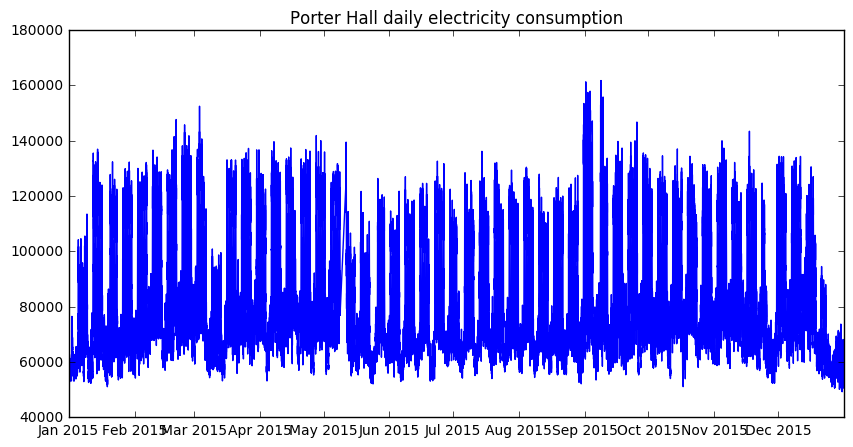

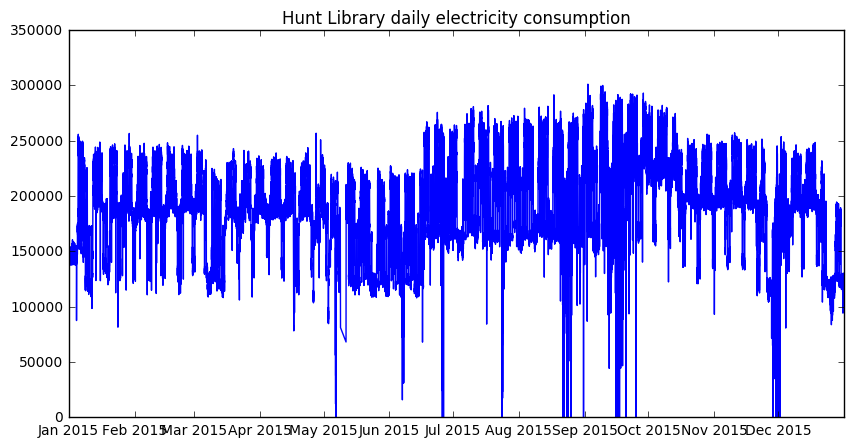

In [39]:
fig1=plt.figure(figsize=(10,5))
plt.plot(filled_data['Porter Hall Electric Real Power'])
plt.title('Porter Hall daily electricity consumption')
plt.show()

fig2=plt.figure(figsize=(10,5))
plt.title('Hunt Library daily electricity consumption')
plt.plot(filled_data['Hunt Library Real Power'])
plt.show()

Now we use the data grouped by Hour to plot the hourly consumption of Porter Hall and Hunt Library.

In [40]:

data_groupbyHour=data.groupby(['Hour']).mean()
data_groupbyHour

,Porter Hall Electric Real Power,Hunt Library Real Power
Hour,,
0,69502.823964,181685
1,67794.910638,180643
2,66911.079051,180475
3,65536.111444,173783
4,65310.150892,172685
5,64615.124793,178130
6,65101.962983,177857
7,66965.664360,181316
8,77209.325121,196087


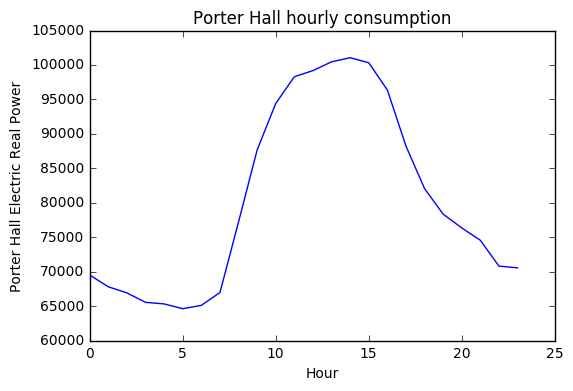

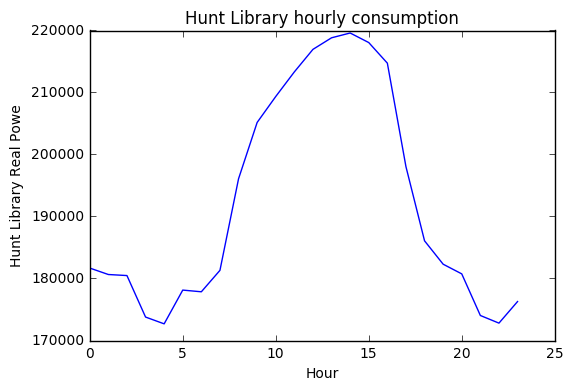

In [41]:
plt.plot(data_groupbyHour['Porter Hall Electric Real Power'])
plt.title('Porter Hall hourly consumption')
plt.xlabel('Hour')
plt.ylabel('Porter Hall Electric Real Power')
plt.show()

plt.plot(data_groupbyHour['Hunt Library Real Power'])
plt.title('Hunt Library hourly consumption')
plt.xlabel('Hour')
plt.ylabel('Hunt Library Real Powe')
plt.show()

We plot the hourly consumption of both dataset in one figure in order to compared the trend of the electric consumption.

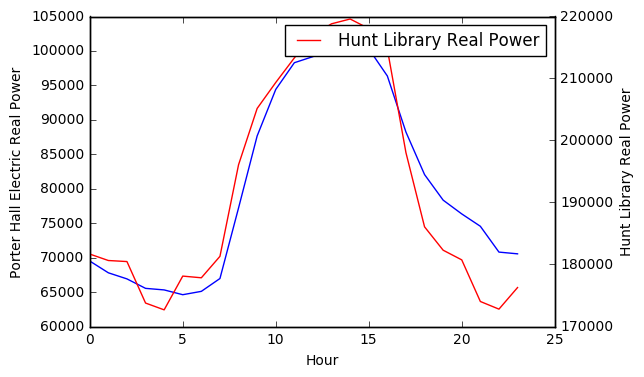

In [42]:
fig6=plt.figure()
ax1=plt.subplot()
ax1.plot(data_groupbyHour['Porter Hall Electric Real Power'],color='b')
plt.ylabel('Porter Hall Electric Real Power')
plt.xlabel('Hour')

ax2=ax1.twinx()
ax2.plot(data_groupbyHour['Hunt Library Real Power'],color='r')
plt.ylabel('Hunt Library Real Power')
plt.xlabel('Hour')
plt.legend()
plt.show()

Now we use the data grouped by date to plot the daily consumption of Porter Hall and Hunt Library.

In [72]:
data_groupbyDate=data.groupby(['Date']).mean()
data_groupbyDate

,Porter Hall Electric Real Power,Hunt Library Real Power,Hour,DayOfYear
Date,,,,
2015-01-01,56448.404167,147581.155556,11.500000,1.0
2015-01-02,62028.961806,148426.591667,11.500000,2.0
2015-01-03,56550.805285,147290.475330,11.500347,3.0
2015-01-04,57441.488889,146173.771528,11.500000,4.0
2015-01-05,73615.118750,197326.864583,11.500000,5.0
2015-01-06,73268.491975,194809.591068,11.482903,6.0
2015-01-07,69641.068056,196610.704861,11.500000,7.0
2015-01-08,74347.162500,175815.981250,11.500000,8.0
2015-01-09,78396.432639,165250.492361,11.500000,9.0


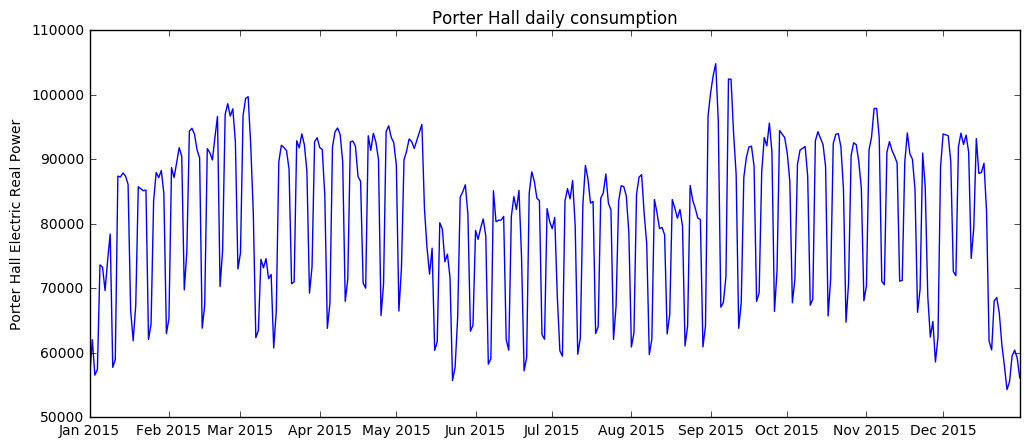

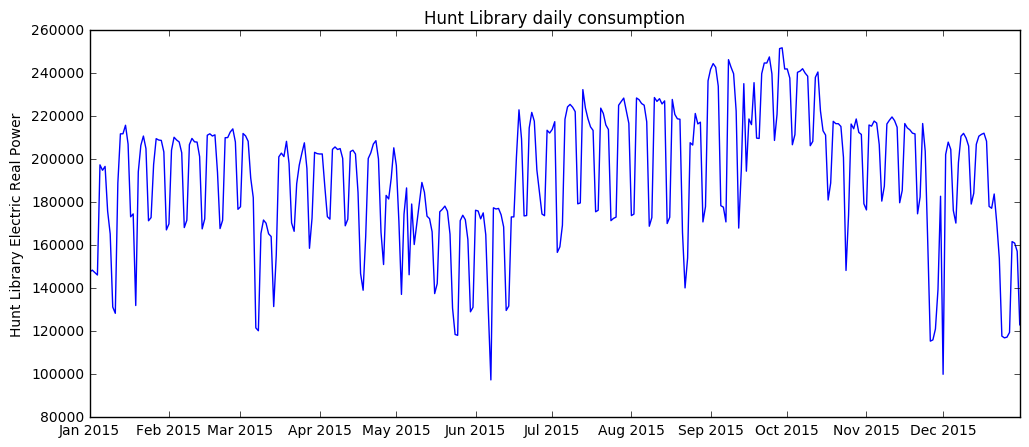

In [44]:
fig3=plt.figure(figsize=(12,5))
plt.plot(data_groupbyDate['Porter Hall Electric Real Power'])
plt.title('Porter Hall daily consumption')
plt.ylabel('Porter Hall Electric Real Power')
plt.show()

fig4=plt.figure(figsize=(12,5))
plt.title('Hunt Library daily consumption')
plt.plot(data_groupbyDate['Hunt Library Real Power'])
plt.ylabel('Hunt Library Electric Real Power')
plt.show()

We plot the daily consumption of both dataset in one figure in order to compared the trend of the electric consumption.

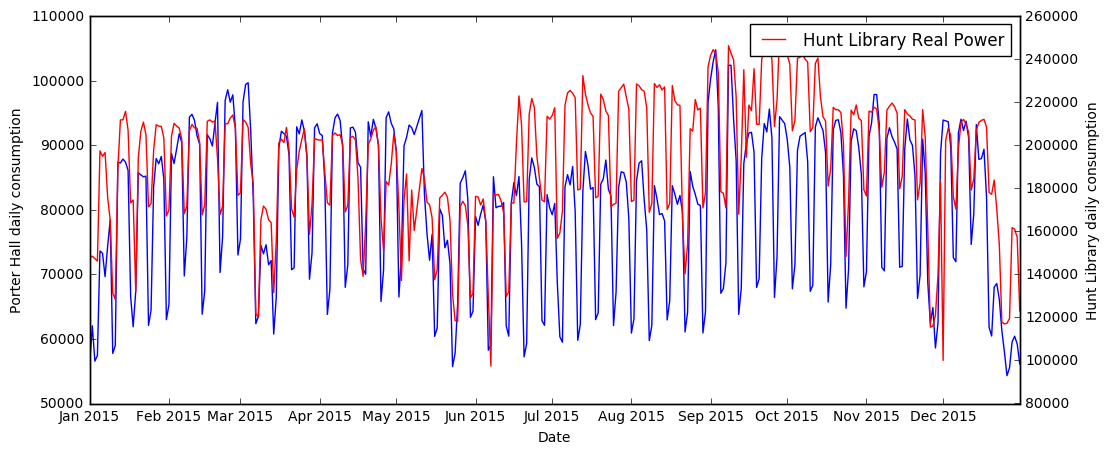

In [45]:
fig5=plt.figure(figsize=(12,5))
ax1=plt.subplot()
ax1.plot(data_groupbyDate['Porter Hall Electric Real Power'],color='b')
plt.ylabel('Porter Hall daily consumption')
plt.xlabel('Date')

ax2=ax1.twinx()
ax2.plot(data_groupbyDate['Hunt Library Real Power'],color='r')
plt.ylabel('Hunt Library daily consumption')
plt.xlabel('Date')
plt.legend()
plt.show()

Now we are going to plot the heat map of the electric consumption of both dataset.

In [46]:
data['DayOfYear'] = data['Timestamp'].dt.dayofyear
loadCurves1 = data.groupby(['DayOfYear', 'Hour'])['Porter Hall Electric Real Power'].mean().unstack()
loadCurves2 = data.groupby(['DayOfYear', 'Hour'])['Hunt Library Real Power'].mean().unstack()

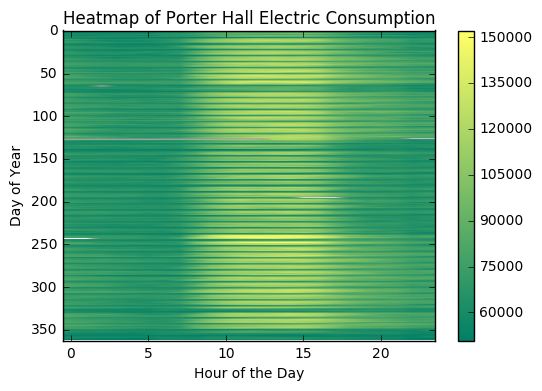

In [47]:
import matplotlib.colors as clrs
plt.imshow(loadCurves1, aspect='auto',cmap='summer')
plt.title('Heatmap of Porter Hall Electric Consumption')
plt.ylabel('Day of Year')
plt.xlabel('Hour of the Day')
plt.colorbar()

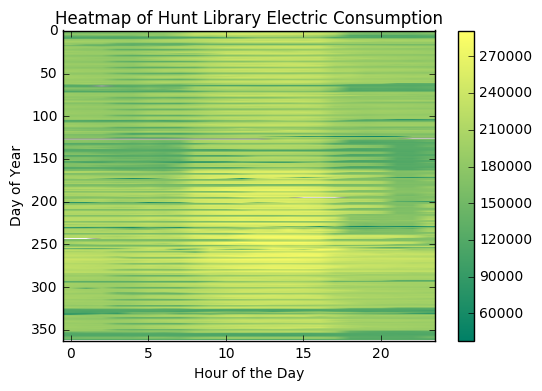

In [48]:
plt.imshow(loadCurves2, aspect='auto',cmap='summer')
plt.title('Heatmap of Hunt Library Electric Consumption')
plt.ylabel('Day of Year')
plt.xlabel('Hour of the Day')
plt.colorbar()

In [71]:
data_groupbyDate

,Porter Hall Electric Real Power,Hunt Library Real Power,Hour,DayOfYear
Date,,,,
2015-01-01,56448.404167,147581.155556,11.500000,1.0
2015-01-02,62028.961806,148426.591667,11.500000,2.0
2015-01-03,56550.805285,147290.475330,11.500347,3.0
2015-01-04,57441.488889,146173.771528,11.500000,4.0
2015-01-05,73615.118750,197326.864583,11.500000,5.0
2015-01-06,73268.491975,194809.591068,11.482903,6.0
2015-01-07,69641.068056,196610.704861,11.500000,7.0
2015-01-08,74347.162500,175815.981250,11.500000,8.0
2015-01-09,78396.432639,165250.492361,11.500000,9.0


Now we are using the regression tree to analyze the data.

In [81]:
def plot_regdataOfPorter():
    plt.plot(data_groupbyDate['DayOfYear'],data_groupbyDate['Porter Hall Electric Real Power'],'rd')
    plt.xlabel('DayOfYear')
    plt.ylabel('Porter Hall Electric Real Power')
def plot_regdataOfHunt():
    plt.plot(data_groupbyDate['DayOfYear'],data_groupbyDate['Hunt Library Real Power'],'rd')
    plt.xlabel('DayOfYear')
    plt.ylabel('Hunt Library Real Power')

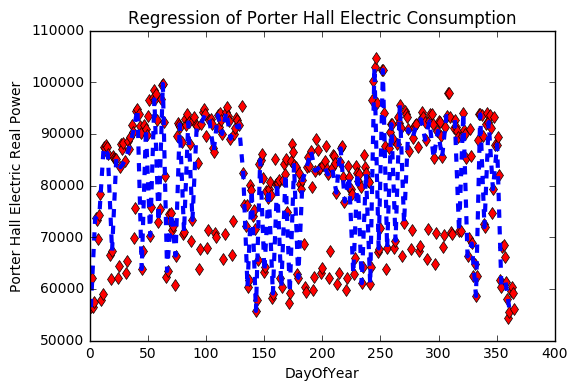

In [85]:
from sklearn import tree
x = data_groupbyDate['DayOfYear']
y = data_groupbyDate['Porter Hall Electric Real Power']
xrange = np.arange(x.min(),x.max(),(x.max()-x.min())/100).reshape(100,1)
x = x[:, None]
reg = tree.DecisionTreeRegressor() # Default parameters, though you can tweak these!
reg.fit(x,y)

plot_regdataOfPorter()
plt.title('Regression of Porter Hall Electric Consumption')
plt.plot(xrange,reg.predict(xrange),'b--',linewidth=3)
plt.show()

In [86]:
print(reg.score(x,y))

1.0


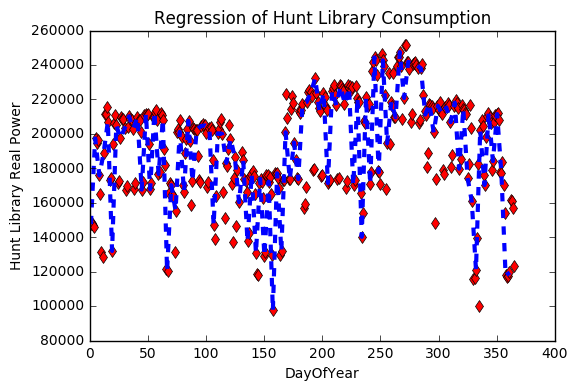

In [87]:
x = data_groupbyDate['DayOfYear']
y = data_groupbyDate['Hunt Library Real Power']
xrange = np.arange(x.min(),x.max(),(x.max()-x.min())/100).reshape(100,1)
x = x[:, None]
reg = tree.DecisionTreeRegressor() # Default parameters, though you can tweak these!
reg.fit(x,y)

plot_regdataOfHunt()
plt.title('Regression of Hunt Library Consumption')
plt.plot(xrange,reg.predict(xrange),'b--',linewidth=3)
plt.show()

In [88]:
print(reg.score(x,y))

1.0
